In [2]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from datetime import datetime, timedelta
from kubernetes import client, config

# Connect to Prometheus
# Kubernetes Config
config.load_kube_config()
v1 = client.CoreV1Api()

# Prometheus Config
#prom_url = "http://<PROMETHEUS_SERVER_IP>:<PORT>"
# prom_url = "http://10.110.188.57:9090"
prom_url = "http://10.105.116.175:9090"

prom = PrometheusConnect(url=prom_url, disable_ssl=True)
#test prom connection
prom_connect_response = prom.custom_query(query="up")
print(prom_connect_response)


# Define the namespace and time range
namespace = 'social-network'
time_range = timedelta(minutes=160)
end_time = datetime.now()
start_time = end_time - time_range

# Define Prometheus queries for response time and throughput
response_time_query = f"rate(istio_request_duration_milliseconds_sum{{namespace='{namespace}'}}[{int(time_range.total_seconds())}s]) / rate(istio_requests_total{{namespace='{namespace}'}}[{int(time_range.total_seconds())}s])"
throughput_query = f"rate(istio_requests_total{{namespace='{namespace}'}}[{int(time_range.total_seconds())}s])"

# Fetch metrics data
response_time_data = prom.custom_query_range(
    query=response_time_query,
    start_time=start_time,
    end_time=end_time,
    step='10s' # Query resolution step width in duration
)
throughput_data = prom.custom_query_range(
    query=throughput_query,
    start_time=start_time,
    end_time=end_time,
    step='10s'
)


# Convert to DataFrame for easy manipulation
response_time_df = MetricRangeDataFrame(response_time_data)
throughput_df = MetricRangeDataFrame(throughput_data)

# Calculate average response time and throughput
average_response_time = response_time_df['value'].mean()
average_throughput = throughput_df['value'].mean()

# Print the results
print(f"Average Response Time over last 10 minutes: {average_response_time} ms")
print(f"Average Throughput over last 10 minutes: {average_throughput} requests/second")

[{'metric': {'__name__': 'up', 'app': 'compose-post-service', 'instance': '192.168.140.15:15020', 'job': 'kubernetes-pods', 'namespace': 'social-network2', 'pod': 'compose-post-service-866f6d7b74-nsc75', 'pod_template_hash': '866f6d7b74', 'security_istio_io_tlsMode': 'istio', 'service': 'compose-post-service', 'service_istio_io_canonical_name': 'compose-post-service', 'service_istio_io_canonical_revision': 'latest'}, 'value': [1716291446.113, '1']}, {'metric': {'__name__': 'up', 'app': 'compose-post-service', 'instance': '192.168.69.255:15020', 'job': 'kubernetes-pods', 'namespace': 'social-network', 'pod': 'compose-post-service-866f6d7b74-hp82n', 'pod_template_hash': '866f6d7b74', 'security_istio_io_tlsMode': 'istio', 'service': 'compose-post-service', 'service_istio_io_canonical_name': 'compose-post-service', 'service_istio_io_canonical_revision': 'latest'}, 'value': [1716291446.113, '1']}, {'metric': {'__name__': 'up', 'app': 'details', 'instance': '192.168.231.244:15020', 'job': 'k

In [3]:
response_time_df

,app,connection_security_policy,destination_app,destination_canonical_revision,destination_canonical_service,destination_cluster,destination_principal,destination_service,destination_service_name,destination_service_namespace,...,service_istio_io_canonical_revision,source_app,source_canonical_revision,source_canonical_service,source_cluster,source_principal,source_version,source_workload,source_workload_namespace,value
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-05-21 08:57:26,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,NaN
2024-05-21 08:57:36,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,NaN
2024-05-21 08:57:46,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,NaN
2024-05-21 08:57:56,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,NaN
2024-05-21 08:58:06,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-21 11:36:46,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,NaN
2024-05-21 11:36:56,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,NaN
2024-05-21 11:37:06,nginx-thrift,none,nginx-thrift,latest,nginx-thrift,Kubernetes,unknown,nginx-thrift.social-network.svc.cluster.local,nginx-thrift,social-network,...,latest,unknown,latest,unknown,unknown,unknown,unknown,unknown,unknown,NaN


In [4]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from datetime import datetime, timedelta
from kubernetes import client, config
import re

def get_average_response_time_and_throughput(time_range="10m", query_step="10s"):
    # Connect to Prometheus
    # Kubernetes Config
    config.load_kube_config()
    v1 = client.CoreV1Api()

    # Prometheus Config
    prom_url = "http://10.105.116.175:9090"
    prom = PrometheusConnect(url=prom_url, disable_ssl=True)

    # Test Prometheus connection
    prom_connect_response = prom.custom_query(query="up")
    if not prom_connect_response:
        raise Exception("Failed to connect to Prometheus")

    # Define the namespace
    namespace = 'social-network'

    # Parse time_range to get timedelta
    time_value, time_unit = int(re.match(r"(\d+)", time_range).group(0)), re.match(r"(\d+)(\D+)", time_range).group(2)
    time_delta_map = {'s': 'seconds', 'm': 'minutes', 'h': 'hours', 'd': 'days'}
    time_kwargs = {time_delta_map[time_unit]: time_value}
    time_range_delta = timedelta(**time_kwargs)

    end_time = datetime.now()
    start_time = end_time - time_range_delta

    # Define Prometheus queries for response time and throughput
    response_time_query = f"rate(istio_request_duration_milliseconds_sum{{namespace='{namespace}'}}[{time_range}]) / rate(istio_requests_total{{namespace='{namespace}'}}[{time_range}])"
    throughput_query = f"rate(istio_requests_total{{namespace='{namespace}'}}[{time_range}])"

    # Fetch metrics data
    response_time_data = prom.custom_query_range(
        query=response_time_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )
    throughput_data = prom.custom_query_range(
        query=throughput_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )

    # Convert to DataFrame for easy manipulation
    response_time_df = MetricRangeDataFrame(response_time_data)
    throughput_df = MetricRangeDataFrame(throughput_data)

    # Calculate average response time and throughput
    average_response_time = response_time_df['value'].mean()
    average_throughput = throughput_df['value'].mean()

    return average_response_time, average_throughput

# Run usage
# time_range represnets the how long of the historical data that need to look for.
average_response_time, average_throughput = get_average_response_time_and_throughput(time_range="100m", query_step="10s")
print(f"Average Response Time: {average_response_time} ms")
print(f"Average Throughput: {average_throughput} requests/second")


Average Response Time: 48.568939021414856 ms
Average Throughput: 0.009818488083833597 requests/second


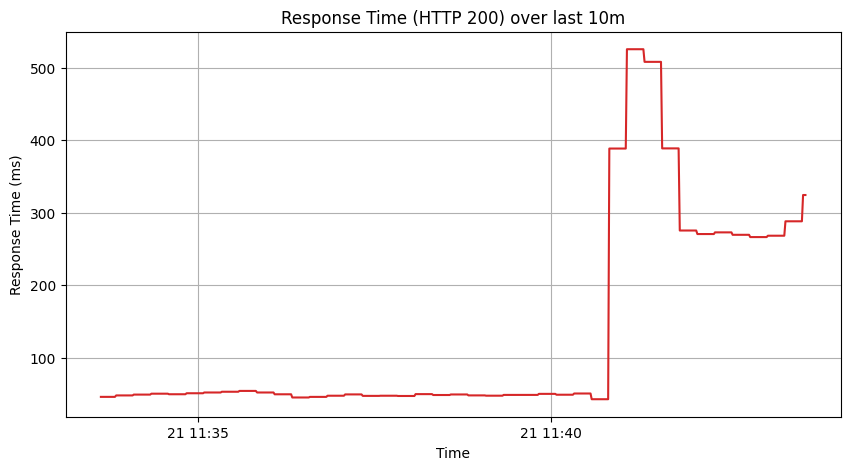

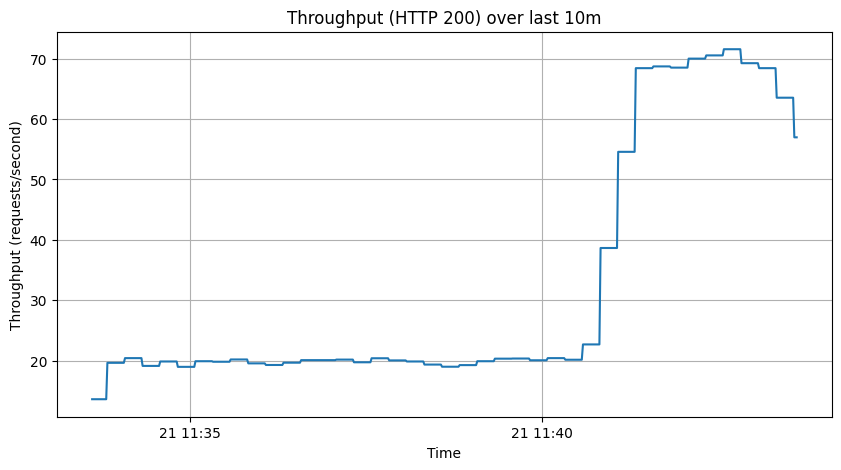

Average Response Time: 129.57346293429583 ms
Average Throughput: 32.30778332408948 requests/second


In [22]:
from prometheus_api_client import PrometheusConnect, MetricRangeDataFrame
from datetime import datetime, timedelta
from kubernetes import client, config
import re
import matplotlib.pyplot as plt
import pandas as pd


def get_metrics_data(time_range="10m", rate_parameter="1m", query_step="10s"):
    # Connect to Prometheus
    config.load_kube_config()
    v1 = client.CoreV1Api()

    # Prometheus Config
    prom_url = "http://10.105.116.175:9090"
    prom = PrometheusConnect(url=prom_url, disable_ssl=True)

    # Test Prometheus connection
    prom_connect_response = prom.custom_query(query="up")
    if not prom_connect_response:
        raise Exception("Failed to connect to Prometheus")

    # Define the namespace
    namespace = 'social-network'

    # Parse time_range to get timedelta
    time_value, time_unit = int(re.match(r"(\d+)", time_range).group(0)), re.match(r"(\d+)(\D+)", time_range).group(2)
    time_delta_map = {'s': 'seconds', 'm': 'minutes', 'h': 'hours', 'd': 'days'}
    time_kwargs = {time_delta_map[time_unit]: time_value}
    time_range_delta = timedelta(**time_kwargs)

    end_time = datetime.now()
    start_time = end_time - time_range_delta

    # Define Prometheus queries for response time and throughput
    response_time_query = f"rate(istio_request_duration_milliseconds_sum{{namespace='{namespace}',response_code='200'}}[{rate_parameter}]) / rate(istio_requests_total{{namespace='{namespace}',response_code='200'}}[{rate_parameter}])"
    throughput_query = f"rate(istio_requests_total{{namespace='{namespace}',response_code='200'}}[{rate_parameter}])"

    # Fetch metrics data
    response_time_data = prom.custom_query_range(
        query=response_time_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )
    throughput_data = prom.custom_query_range(
        query=throughput_query,
        start_time=start_time,
        end_time=end_time,
        step=query_step
    )

    # Convert to DataFrame for easy manipulation
    response_time_df = MetricRangeDataFrame(response_time_data)
    throughput_df = MetricRangeDataFrame(throughput_data)

    # Remove NaN values
    response_time_df = response_time_df.dropna()
    throughput_df = throughput_df.dropna()

    # Detect gaps and insert NaNs
    response_time_df = response_time_df.asfreq(query_step).fillna(value=pd.NA)
    throughput_df = throughput_df.asfreq(query_step).fillna(value=pd.NA)

    # Calculate average response time and throughput
    average_response_time = response_time_df['value'].mean()
    average_throughput = throughput_df['value'].mean()

    return response_time_df, throughput_df, average_response_time, average_throughput

def plot_metrics(time_range="100m", rate_parameter="1m", query_step="10s"):
    response_time_df, throughput_df, average_response_time, average_throughput = get_metrics_data(time_range, rate_parameter, query_step)

    # Plot Response Time
    plt.figure(figsize=(10, 5))
    plt.plot(response_time_df.index, response_time_df['value'], color='tab:red')
    plt.xlabel('Time')
    plt.ylabel('Response Time (ms)')
    plt.title(f"Response Time (HTTP 200) over last {time_range}")
    plt.grid(True)
    plt.show()

    # Plot Throughput
    plt.figure(figsize=(10, 5))
    plt.plot(throughput_df.index, throughput_df['value'], color='tab:blue')
    plt.xlabel('Time')
    plt.ylabel('Throughput (requests/second)')
    plt.title(f"Throughput (HTTP 200) over last {time_range}")
    plt.grid(True)
    plt.show()

    print(f"Average Response Time: {average_response_time} ms")
    print(f"Average Throughput: {average_throughput} requests/second")

# Example usage
plot_metrics(time_range="10m", rate_parameter="1m", query_step="1s")
